### Visualize results of decoding
- per feature binary decoding
- when max feat is rule, got it correct
- look at different normalizations, block zscore, block mean subtract
- compare against a shuffle where block rules are shuffled. 


In [2]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *


import scipy


In [3]:
PRE_INTERVAL = 500
POST_INTERVAL = 500
INTERVAL_SIZE = 50
SMOOTH = 1
EVENT = "CrossFixation"
OUTPUT_DIR = "/data/patrick_res/hyak/pseudo"
# path to a dataframe of sessions to analyze
SESSIONS_PATH = "/data/patrick_res/sessions/valid_sessions_rpe.pickle"

num_shuffles = 5

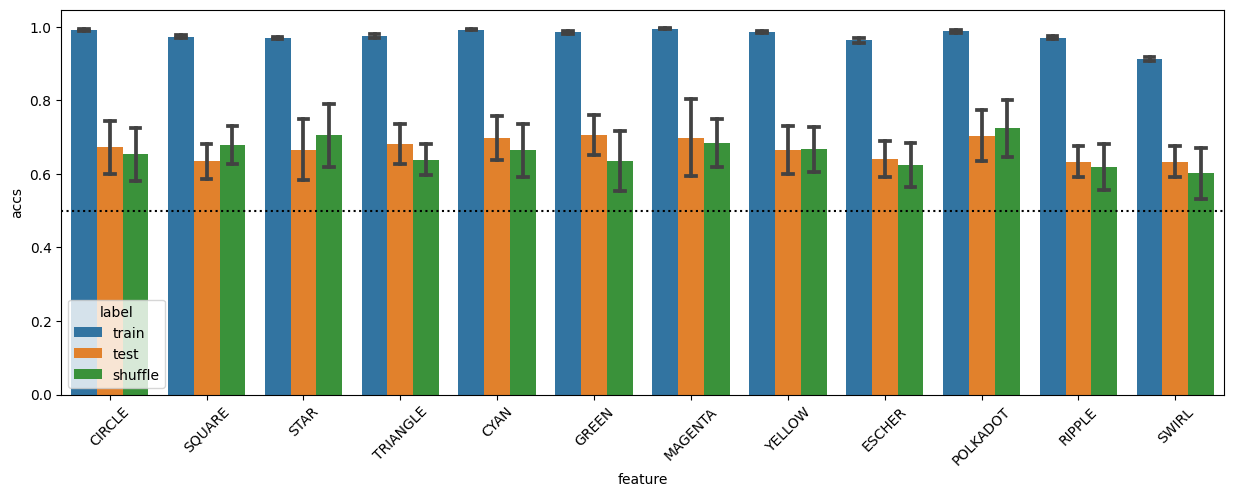

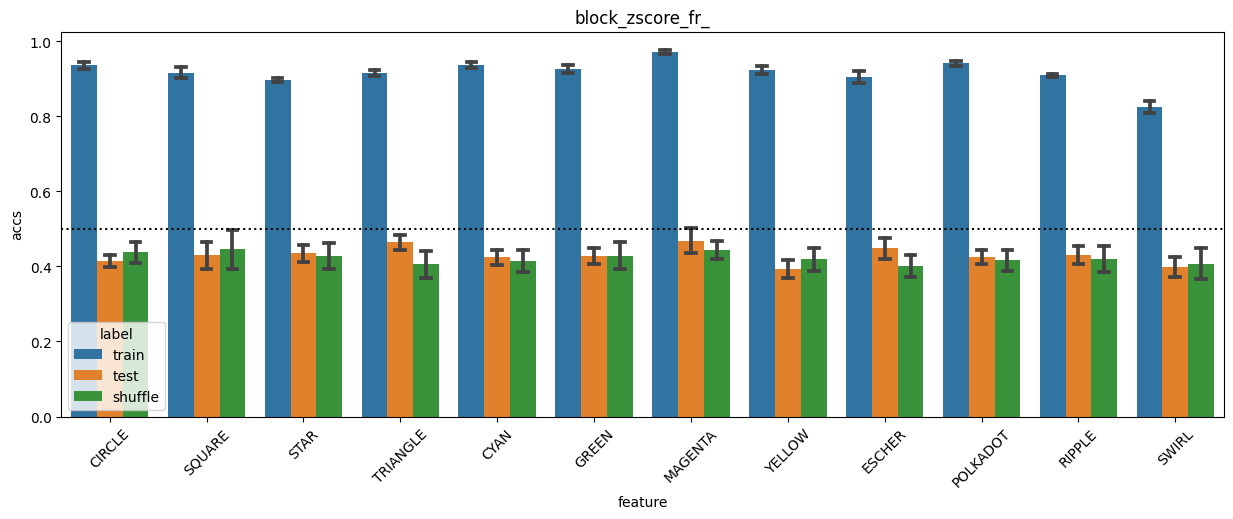

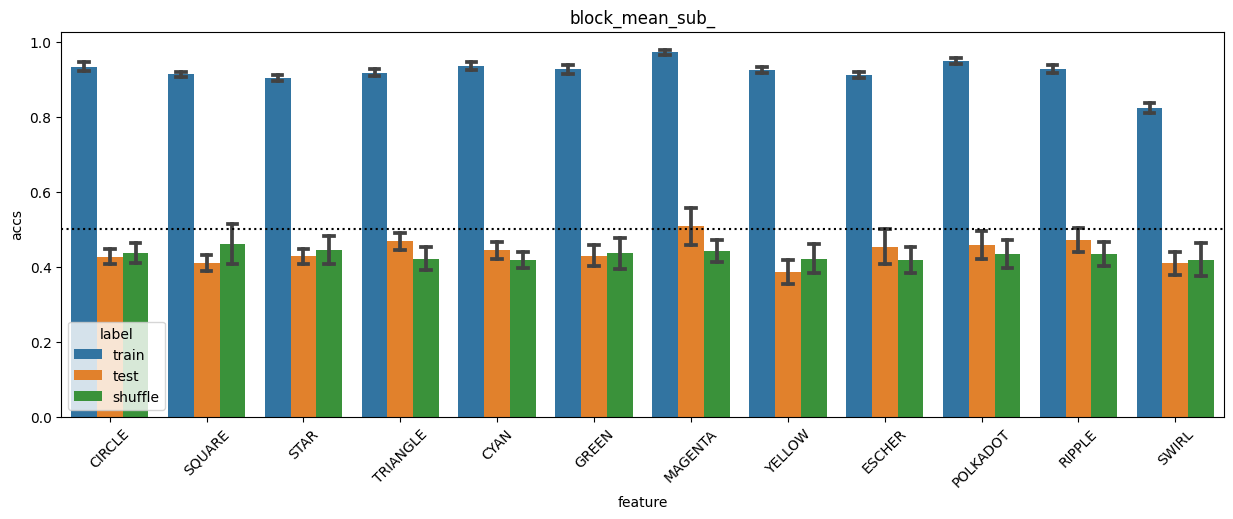

In [8]:
import seaborn as sns

norms = ["", "block_zscore_fr_", "block_mean_sub_"]
for norm_type in norms:
    fig, ax = plt.subplots(figsize=(15, 5))
    dfs = []
    accs = []
    labels = []
    for feat in FEATURES:
        train_acc = np.load(os.path.join(OUTPUT_DIR, f"max_feat_{feat}_{norm_type}train_accs.npy")).reshape((-1))
        test_acc = np.load(os.path.join(OUTPUT_DIR, f"max_feat_{feat}_{norm_type}test_accs.npy")).reshape((-1))
        shuffle_accs = []
        for i in range(num_shuffles):
            shuffle_acc = np.load(os.path.join(OUTPUT_DIR, f"max_feat_{feat}_shuffle_{i}_{norm_type}test_accs.npy")).reshape((-1))
            shuffle_accs.append(shuffle_acc)
        shuffle_accs = np.concatenate(shuffle_accs)
        train_df = pd.DataFrame({"feature": feat, "accs": train_acc, "label": "train"})
        test_df = pd.DataFrame({"feature": feat, "accs": test_acc, "label": "test"})
        shuffle_df = pd.DataFrame({"feature": feat, "accs": shuffle_accs, "label": "shuffle"})
        dfs += [train_df, test_df, shuffle_df]
        # accs += [test_acc, shuffle_accs]
        # labels += [feat, feat + " shuffle"]
    df = pd.concat(dfs)
    sns.barplot(data=df, x='feature', y='accs', hue='label', capsize=.1, errorbar='sd', ax=ax)
    # sns.swarmplot(data=df, x='feature', y='accs', hue='label', color="0", alpha=.35, ax=ax)
    ax.axhline(0.5, color='black', linestyle='dotted', label="Estimated Chance")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_title(norm_type)

### Look at pairs, GREEN MAGENTA, no norm

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:0'` for same effect.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'GREEN vs MAGENTA, 8 sessions')

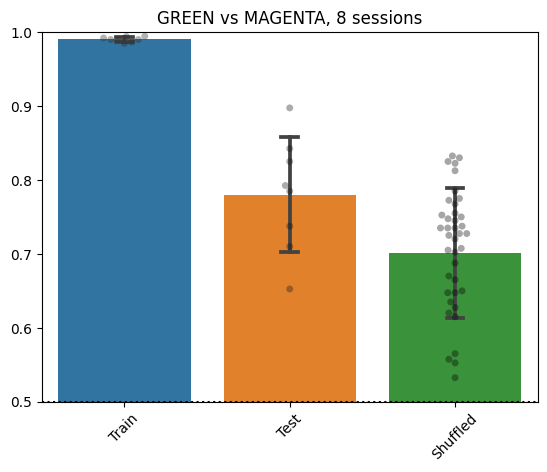

In [12]:
import seaborn as sns

fig, ax = plt.subplots()
train_acc = np.load(os.path.join(OUTPUT_DIR, f"max_feat_GREEN_MAGENTA_train_accs.npy")).reshape((-1))
test_acc = np.load(os.path.join(OUTPUT_DIR, f"max_feat_GREEN_MAGENTA_test_accs.npy")).reshape((-1))
shuffle_accs = []
for i in range(num_shuffles):
    shuffle_acc = np.load(os.path.join(OUTPUT_DIR, f"max_feat_GREEN_MAGENTA_shuffle_{i}_test_accs.npy")).reshape((-1))
    shuffle_accs.append(shuffle_acc)
shuffle_accs = np.concatenate(shuffle_accs)
    # accs += [test_acc, shuffle_accs]
    # labels += [feat, feat + " shuffle"]
visualization_utils.visualize_accuracy_bars([train_acc, test_acc, shuffle_accs], ["Train", "Test", "Shuffled"], ax)
ax.axhline(0.5, color='black', linestyle='dotted', label="Estimated Chance")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylim([0.5, 1])
ax.set_title("GREEN vs MAGENTA, 8 sessions")